In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pr = pd.read_csv("~/Downloads/prostate.csv")

In [186]:
pr.dtypes

capsule      int64
age          int64
race         int64
dpros        int64
dcaps        int64
psa        float64
vol        float64
gleason      int64
dtype: object

In [187]:
def get_train_test(X,y,test_size=0.33,random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)
    return(X_train, X_test, y_train, y_test)

def plot_importance(model=rf):
    feat_importances = pd.DataFrame(model.feature_importances_, 
                                    index=X.columns, 
                                    columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar')

In [188]:
y = pr.capsule
X = pr.drop('capsule',axis=1)

X_train, X_test, y_train, y_test = get_train_test(X,y)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        76
           1       0.62      0.58      0.60        50

    accuracy                           0.69       126
   macro avg       0.68      0.67      0.67       126
weighted avg       0.69      0.69      0.69       126



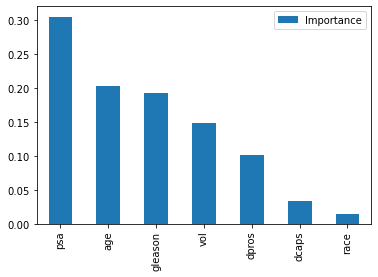

In [189]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

print(classification_report(y_test,rf.predict(X_test)))    
plot_importance(rf)

In [190]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        76
           1       0.60      0.54      0.57        50

    accuracy                           0.67       126
   macro avg       0.66      0.65      0.65       126
weighted avg       0.67      0.67      0.67       126



In [191]:
pr1 = pd.get_dummies(pr,columns=['dpros','dcaps','race']).copy()
X = pr1.drop('capsule',axis=1)
y = pr1.capsule

X_train, X_test, y_train, y_test = get_train_test(X,y)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        76
           1       0.64      0.58      0.61        50

    accuracy                           0.71       126
   macro avg       0.69      0.68      0.69       126
weighted avg       0.70      0.71      0.70       126



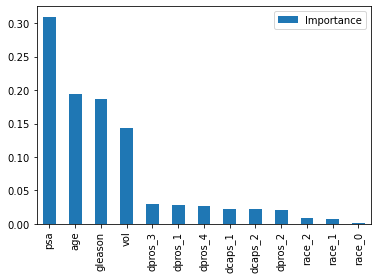

In [206]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
print(classification_report(y_test,rf.predict(X_test)))
plot_importance(rf)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        76
           1       0.62      0.56      0.59        50

    accuracy                           0.69       126
   macro avg       0.68      0.67      0.67       126
weighted avg       0.69      0.69      0.69       126



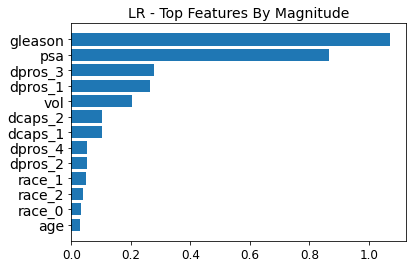

In [193]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = get_train_test(X_scaled,y)
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
print(classification_report(y_test,lr.predict(X_test)))

# Extract the coefficients
importance = lr.coef_[0]
    
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

In [219]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

model = SelectKBest(chi2, k=6).fit(X, y)

X_new = SelectKBest(chi2, k=6).fit_transform(X, y)

In [194]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [156]:
svc.score(X_test,y_test)

0.7222222222222222

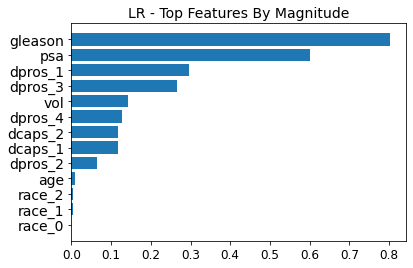

In [159]:
# Extract the coefficients
importance = svc.coef_[0]
    
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

In [160]:
import seaborn as sns

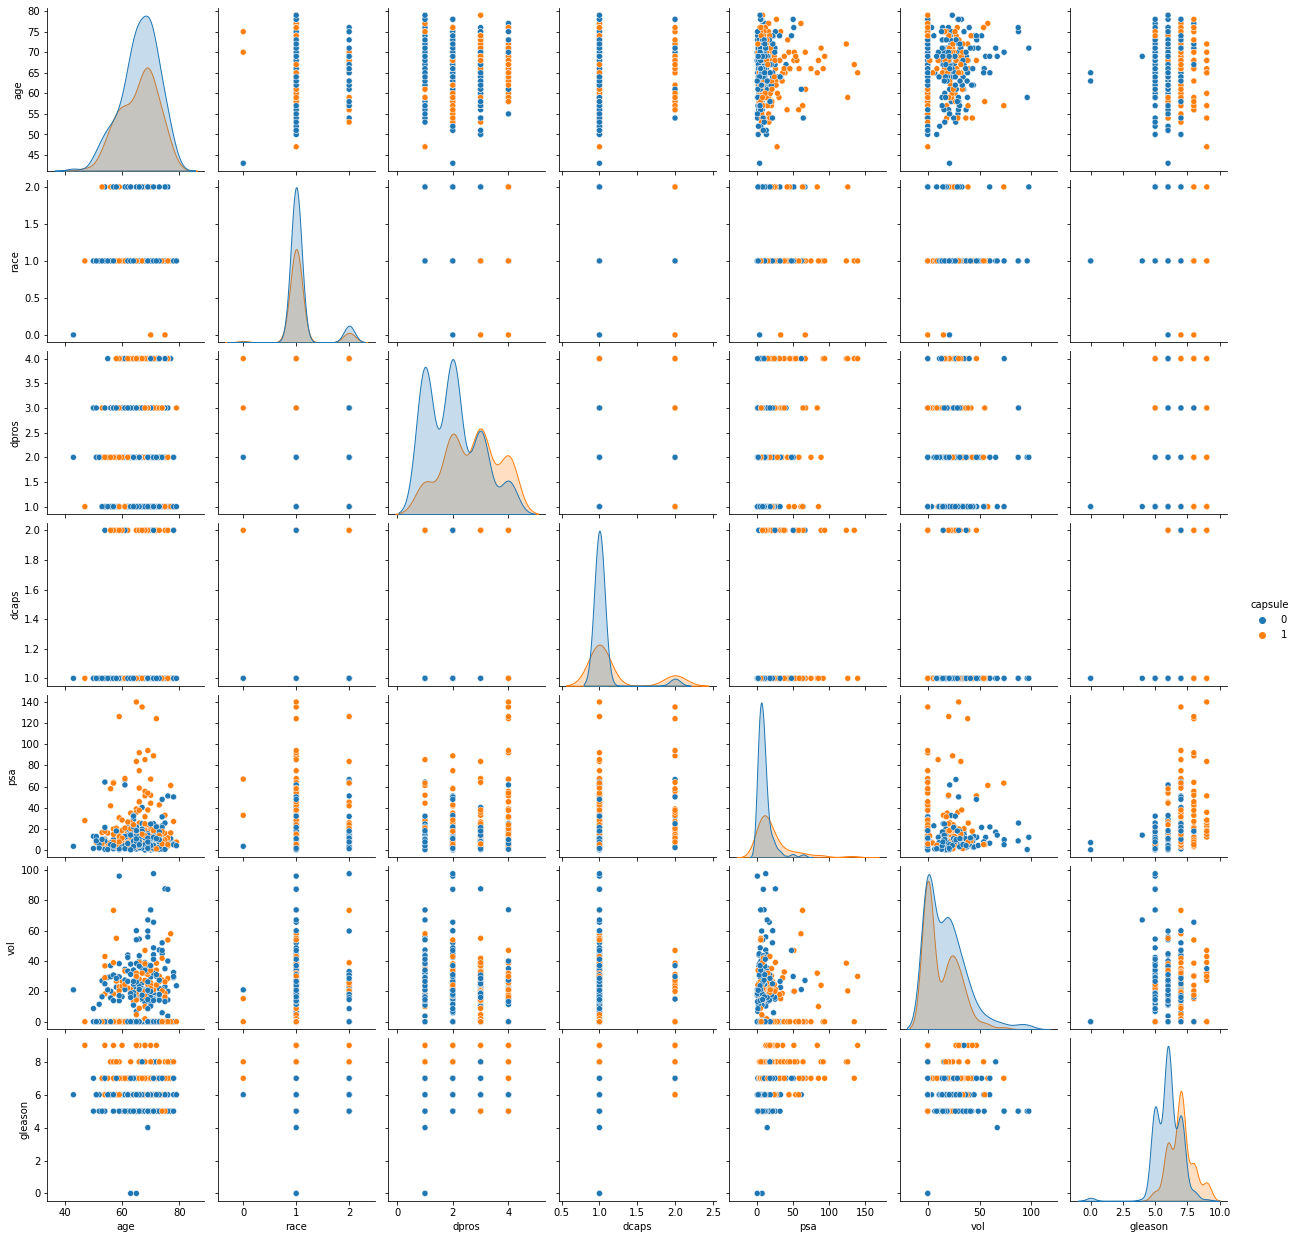

In [167]:
sns.pairplot(pr,hue="capsule")

In [166]:
pr

,capsule,age,race,dpros,dcaps,psa,vol,gleason
0,0,65,1,2,1,1.4,0.0,6
1,0,72,1,3,2,6.7,0.0,7
2,0,70,1,1,2,4.9,0.0,6
3,0,76,2,2,1,51.2,20.0,7
4,0,69,1,1,1,12.3,55.9,6
...,...,...,...,...,...,...,...,...
375,0,58,2,3,1,18.2,28.6,7
376,0,69,2,1,1,7.9,14.6,5
377,1,76,1,2,1,5.5,53.9,8
378,0,69,2,2,1,1.5,8.6,5


In [176]:
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)


0.8690157644777647

In [170]:
lin_reg.coef_

array([-0.11144048,  0.01333524, -0.02148212,  0.78711097, -3.71530393,
        0.82104075,  0.31776281,  2.52022689,  0.65541302, -0.19941925])

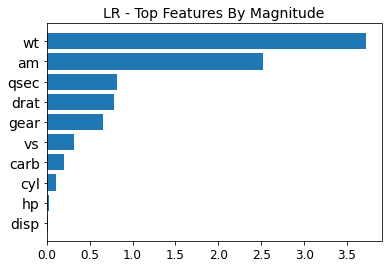

In [172]:
importance = lin_reg.coef_
    
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

In [181]:
mtcars_2 = pd.get_dummies(mtcars,columns=['cyl','am','vs']).copy()

X = mtcars_2.drop('mpg',axis=1)
y = mtcars_2.mpg

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.score(X,y)

0.8816004757083713

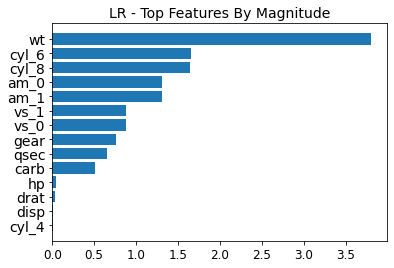

In [182]:
importance = lin_reg.coef_
    
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

In [183]:
pr

,capsule,age,race,dpros,dcaps,psa,vol,gleason
0,0,65,1,2,1,1.4,0.0,6
1,0,72,1,3,2,6.7,0.0,7
2,0,70,1,1,2,4.9,0.0,6
3,0,76,2,2,1,51.2,20.0,7
4,0,69,1,1,1,12.3,55.9,6
...,...,...,...,...,...,...,...,...
375,0,58,2,3,1,18.2,28.6,7
376,0,69,2,1,1,7.9,14.6,5
377,1,76,1,2,1,5.5,53.9,8
378,0,69,2,2,1,1.5,8.6,5
